In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [2]:
train = pd.read_csv("kkbox_data/sorted_train_v2.csv")
train = train.drop("Unnamed: 0", axis=1)

test = pd.read_csv("kkbox_data/sorted_test_v2.csv")
test = test.drop("Unnamed: 0", axis=1)

# There's a row with amt_per_day as infinity, we need to remove it.
train = train.drop(index=1600826)

# Remove columns that is deemed useless
cols = [c for c in train.columns if c not in ['is_churn', 'msno']]

features = pd.DataFrame(train[cols])
features_test = pd.DataFrame(test[cols])
target = pd.DataFrame(train['is_churn'])

In [5]:
y = train['is_churn']
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state = 101)

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=250, criterion = 'entropy', random_state= 101, verbose=3, n_jobs=1, oob_score=False, max_features='auto', min_samples_leaf=1, min_samples_split=2)
classifier.fit(X_train, y_train)

building tree 1 of 250


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


building tree 2 of 250


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.0s remaining:    0.0s


building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250
building tree 44 of 250

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 52.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=101, verbose=3, warm_start=False)

In [7]:
y_pred = classifier.predict(X_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.7min finished


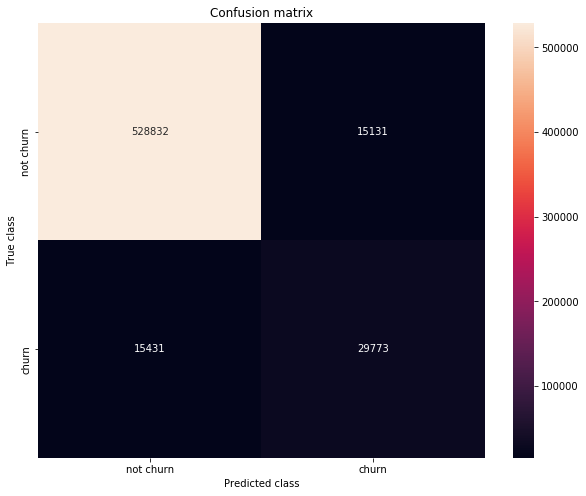

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, xticklabels=['not churn', 'churn'], yticklabels=['not churn', 'churn'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

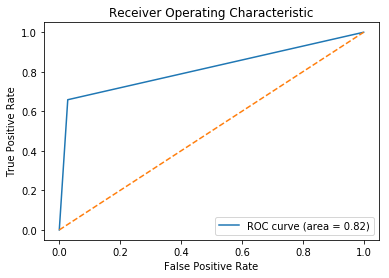

In [9]:
from sklearn.metrics import roc_curve, auc  
 
(false_positive_rate, true_positive_rate, threshold) = roc_curve(y_test, y_pred)  
roc_auc = auc(false_positive_rate, true_positive_rate)  
 
plt.title('Receiver Operating Characteristic')  
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], ls="--")  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.legend(loc="lower right")  
plt.show()  

Most importance 15 features:  ['autorenew_&_not_cancel', 'notAutorenew_&_cancel', 'is_cancel', 'l_day', 'is_auto_renew', 'm_day', 't_day', 'total_secs', 'r_day', 'payment_plan_days', 'num_unq', 'num_100', 'payment_method_id', 'actual_amount_paid', 'r_month', 'registration_init_time', 'plan_list_price', 'transaction_date', 'bd', 'num_25']


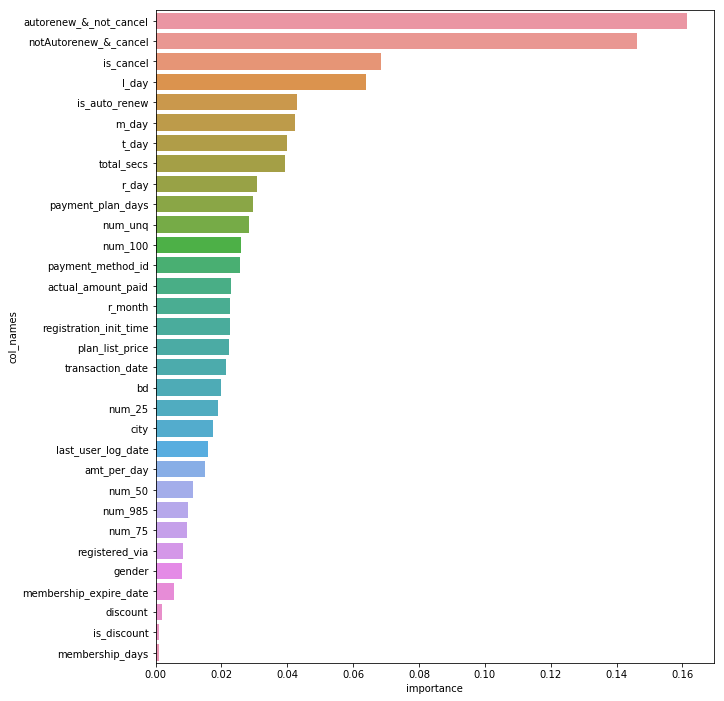

In [10]:
importance = classifier.feature_importances_
importance = pd.DataFrame(importance, index=cols, columns=["importance"])
importance["std"] = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
importance = importance.sort_values('importance', ascending = False)
importance['col_names'] = importance.index

RF_important_cols = list(importance.index)[:20]
print("Most importance 15 features: ", RF_important_cols)
plt.figure(figsize=(10, 12))
sns.barplot(data = importance, y = 'col_names', x = 'importance')

In [11]:
final_rf = classifier.predict_proba(features_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.2min finished


In [12]:
final_rf_csv = pd.DataFrame({'msno': test['msno']})
final_rf = pd.DataFrame(final_rf)
final_rf_csv['is_churn'] = final_rf[1]

In [14]:
final_rf_csv.to_csv('Random_Forest_Probabilites.csv', index=False)

In [15]:
final_rf_csv.head()

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0.000000
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0.000000
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0.001333
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0.000287
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0.000000
